## Analysing and Preparing Data

###Charging Data

In [35]:
# Basic example loading images from the svhn dataset

# Dictionaries
import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/DeepLearning_2022/PROJECT/Data/'
results_path = '/content/drive/My Drive/DeepLearning_2022/PROJECT/Results/'

import csv

# Charge the data

#we read the dataset TweetsEmotions for tweet emotions --> 9870 tweets
data_emotion = pd.read_csv(data_path+'TweetsEmotions.csv', index_col = 0)
#auxiliary dataset for emotions
data_emotion2 = pd.read_csv(data_path+'emotions2.csv', index_col = 0)

#we read the datasets
data_emoji = pd.read_csv(data_path+'emoticons_polarity_emotion_filtered.csv',index_col = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Preparing Data emotion data

In [36]:
#prepare the auxiliary dataset
data_em = {"Feeling":[]}
data_em = pd.DataFrame(data_em)

data_em["Feeling"]=data_emotion2["Feeling"]
data_em.index.name = 'Tweets'
data_em.reset_index(inplace=True)

In [37]:
print(data_em)

                                                  Tweets  Feeling
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]


In [38]:
print(data_em.columns)

Index(['Tweets', 'Feeling'], dtype='object')


In [39]:
print(data_em["Feeling"].value_counts())

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Feeling, dtype: int64


In [40]:
#we will add the surprise rows to the data_e dataset
data_e = data_emotion[['Tweets','Feeling']]
data_e = data_e.append(data_em[data_em['Feeling']=='surprise'],ignore_index=True)
print(data_e)

                                                  Tweets   Feeling
0       #1: @fe ed "RT @MirayaDizon1: Time is ticking...     happy
1       #2: @蓮花 &はすか ed "RT @ninjaryugo: ＃コナモンの日 だそうで...     happy
2       #3: @Ris ♡ ed "Happy birthday to one smokin h...     happy
3       #4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...     happy
4       #5: @Madhurima wth u vc♥ ed "Good morning dea...     happy
...                                                  ...       ...
10584  i spent a lot of time feeling a bit stunned th...  surprise
10585  i believe the most readers feel impressed by t...  surprise
10586      i have to admit im feeling pretty overwhelmed  surprise
10587  i am feeling much like the guy in the pic abov...  surprise
10588  i need to do this that and the other for colle...  surprise

[10589 rows x 2 columns]


In [41]:
data_e = data_e.drop(10019)

In [42]:
data_e['Feeling'].value_counts()

happy       3928
sad         2849
angry       1341
surprise     970
fear         863
disgust      637
Name: Feeling, dtype: int64

In [43]:
#we shuffle the dataset
from sklearn.utils import shuffle
data_e= shuffle(data_e)

In [44]:
#we set the polarity according to the emotions and divide the dataset according to polarity
#we will use data_e_1 (positive polarity)
for i, row in data_e.iterrows():
  if data_e.loc[i, "Feeling"] == "happy" or data_e.loc[i, "Feeling"] == "surprise":
    data_e.loc[i, "Polarity"] = 1
  elif data_e.loc[i, "Feeling"] == "sad" or data_e.loc[i, "Feeling"] == "angry" or data_e.loc[i, "Feeling"] == "fear" or data_e.loc[i, "Feeling"] == "disgust":
    data_e.loc[i, "Polarity"] = 0

data_e.reindex()
data_e_0 = data_e[data_e["Polarity"] == 0].reindex()
data_e_1 = data_e[data_e["Polarity"] == 1].reindex()

In [45]:
data_e["Polarity"].value_counts()

0.0    5690
1.0    4898
Name: Polarity, dtype: int64

In [46]:
#we change the emotion by the corresponding number
for i,row  in data_e_0.iterrows():
  if data_e_0.loc[i, "Feeling"] == "sad":
    data_e_0.loc[i, "Feeling"] = 0
  elif data_e_0.loc[i, "Feeling"] == "angry":
    data_e_0.loc[i, "Feeling"] = 1
  elif data_e_0.loc[i, "Feeling"] == "fear":
    data_e_0.loc[i, "Feeling"] = 2
  elif data_e_0.loc[i, "Feeling"] == "disgust":
    data_e_0.loc[i, "Feeling"] = 3

for i,row  in data_e_1.iterrows():
  if data_e_1.loc[i, "Feeling"] == "happy":
    data_e_1.loc[i, "Feeling"] = 1
  elif data_e_1.loc[i, "Feeling"] == "surprise":
    data_e_1.loc[i, "Feeling"] = 0

In [47]:
data_e_1["Feeling"].value_counts()

1    3928
0     970
Name: Feeling, dtype: int64

###Preparing Data Emotion Polarity 1

In [48]:
import re
from string import punctuation

all_tweets_e_1 = list()

for t in data_e_1["Tweets"]:
  #t = 'a ' + t
  #t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_e_1.append(t)

all_text = " ".join(all_tweets_e_1)
all_words = all_text.split()

In [49]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('ed', 4335), ('the', 2844), ('rt', 2341), ('to', 2250), ('a', 2082), ('and', 2052), ('of', 1804), ('i', 1554), ('you', 1516), ('is', 1148)]


In [50]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [51]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_e_1:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
112752
[7574, 82, 22, 1214, 1, 7575, 145, 263, 920, 7576]


In [52]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_e_1 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_e_1.append(np.array(new))

### Preparing Data Emoji

In [53]:
# Again not all types have the same number of data, dangerous
print(data_emoji)
print(data_emoji["emotion"].value_counts())

                                                  tweet  \
0     The woman who was forced into child labour dur...   
1     A group of children who fled #Mariupol are now...   
2     @MZavala86 @RT_com Dictator Vladimir Putin has...   
3     Yesterday in Brussels during a peaceful strike...   
4     😡 The Russians who left the #Chornobyl nuclear...   
...                                                 ...   
2068  Let’s stop the russian spelling and name it th...   
2069  #Lysychansk after #Putin 🤬 #Лисичанськ #Україн...   
2070  This is really brutal! 🤬\n\nA Ukrainian office...   
2071  Hey #Germany! Are you going to start using #pe...   
2072  Go figure ...India won't condemn Russia for (t...   

                          emoji  polarity  emotion  
0                         ['😭']         0        3  
1                         ['😭']         0        3  
2                         ['😂']         1        1  
3                         ['😓']         0        3  
4                         

###Analysing tweets

In [54]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
train_x=features_e_1[:int(0.8*len(features_e_1))]
train_y=data_e_1["Feeling"][:int(0.8*len(features_e_1))]
valid_x=features_e_1[int(0.8*len(features_e_1)):int(0.9*len(features_e_1))]
valid_y=data_e_1["Feeling"][int(0.8*len(features_e_1)):int(0.9*len(features_e_1))]
test_x=features_e_1[int(0.9*len(features_e_1)):]
test_y=data_e_1["Feeling"][int(0.9*len(features_e_1)):]
print(len(train_y), len(valid_y), len(test_y))

3918 490 490


##Train the model

In [55]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [56]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([64, 87])
Sample input: 
 tensor([[    0,     0,     0,  ...,   162,   606,  1315],
        [    0,     0,     0,  ...,  1325,    23, 18292],
        [    0,     0,     0,  ...,    66,   164, 17076],
        ...,
        [    0,     0,     0,  ...,    24,  2564,   341],
        [    0,     0,     0,  ...,  2135,     2,  3268],
        [    0,     0,     0,  ...,   920, 12440, 12441]])
Sample label size:  torch.Size([64])
Sample label: 
 tensor([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])


In [57]:
import torch.nn as nn
 
class LSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        #dropout layer
        self.dropout=nn.Dropout(0.6)
        
        #Linear and sigmoid layer
        self.fc1=nn.Linear(hidden_dim, output_size)
        #self.fc1=nn.Linear(hidden_dim, 64)
        #self.fc2=nn.Linear(64, 16)
        #self.fc3=nn.Linear(16,output_size) --> worse results
        self.sigmoid=nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        
        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)
        
        #stack up the lstm output
        lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)
        
        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
       
        sig_out=self.sigmoid(out)
        
        sig_out=sig_out.view(batch_size, -1)
        sig_out=sig_out[:, -1]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [58]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 500
n_layers = 2

net = LSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

LSTM(
  (embedding): Embedding(23984, 400)
  (lstm): LSTM(400, 500, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.6, inplace=False)
  (fc1): Linear(in_features=500, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [59]:
# loss and optimization functions
lr=0.0001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 10

training_loss=[]
validation_loss=[]

counter = 0
print_every = 20
# gradient clipping
clip=5 

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        try:
          # get the output from the model
          output, h = net(inputs, h)

          # calculate the loss and perform backprop
          loss = criterion(output.squeeze(), labels.float())
          loss.backward()
          # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
          nn.utils.clip_grad_norm_(net.parameters(), clip)
          optimizer.step()
        except:
          pass
        # validation
        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            error = 0
            for inputs, labels in valid_loader:
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()  
                
                try:
                  output, val_h = net(inputs, val_h)
                  val_loss = criterion(output.squeeze(), labels.float())

                  val_losses.append(val_loss.item())
                except:
                  error+=1
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


Epoch: 1/10... Step: 20... Loss: 0.222456... Val Loss: 0.206690
Epoch: 1/10... Step: 40... Loss: 0.135285... Val Loss: 0.117285
Epoch: 1/10... Step: 60... Loss: 0.084402... Val Loss: 0.105318
Epoch: 2/10... Step: 80... Loss: 0.103785... Val Loss: 0.091760
Epoch: 2/10... Step: 100... Loss: 0.043176... Val Loss: 0.066631
Epoch: 2/10... Step: 120... Loss: 0.055374... Val Loss: 0.053342
Epoch: 3/10... Step: 140... Loss: 0.082885... Val Loss: 0.053686
Epoch: 3/10... Step: 160... Loss: 0.076468... Val Loss: 0.049845
Epoch: 3/10... Step: 180... Loss: 0.047168... Val Loss: 0.046923
Epoch: 4/10... Step: 200... Loss: 0.053385... Val Loss: 0.048776
Epoch: 4/10... Step: 220... Loss: 0.064745... Val Loss: 0.044970
Epoch: 4/10... Step: 240... Loss: 0.041490... Val Loss: 0.047157
Epoch: 5/10... Step: 260... Loss: 0.021646... Val Loss: 0.041898
Epoch: 5/10... Step: 280... Loss: 0.010302... Val Loss: 0.037124
Epoch: 5/10... Step: 300... Loss: 0.013886... Val Loss: 0.041501
Epoch: 6/10... Step: 320... L

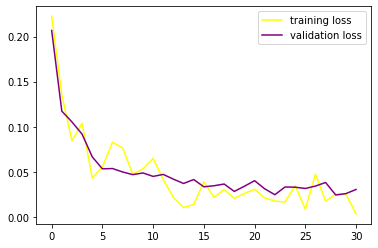

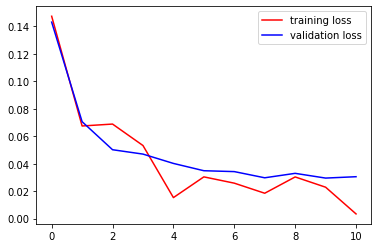

In [60]:
#plot of losses over steps
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

#plot of losses over epochs
t = []
v = []
for i in range(0,11):
  v.append(np.mean(validation_loss[i*3:(i+1)*3]))
  t.append(np.mean(t1[i*3:(i+1)*3]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

In [61]:
#test
test_losses = [] 
num_correct = 0
num_happy_correct = 0
num_surprise_correct = 0
total_p = 0
total_n = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

  h = tuple([each.data for each in h])

  if(train_on_gpu):
    inputs, labels = inputs.cuda(), labels.cuda()

  try:
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)
    #we count the number of correct predictions for each of the emotions
    for i in range(64):
      if labels.float()[i]==1:
        total_p +=1
        correct_tensor = pred.eq(labels.float()[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_happy_correct += np.sum(correct)
      if labels.float()[i]==0:
        total_n +=1
        correct_tensor = pred.eq(labels.float()[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_surprise_correct += np.sum(correct)
  except:
    pass

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
test_acc_p = num_happy_correct/total_p
test_acc_n = num_surprise_correct/total_n
print("Test accuracy: {:.3f}".format(test_acc))
print("Test happy accuracy: {:.6f}".format(test_acc_p))
print("Test surprise accuracy: {:.6f}".format(test_acc_n))

Test loss: 0.037
Test accuracy: 0.873
Test happy accuracy: 0.994118
Test surprise accuracy: 0.833333


##Clean the Ucraine-Russia dataset and use it for polarity testing

In [62]:
a = 'a ' + data_emoji.loc[0,'tweet']
a = re.sub("(?:\s)@[^, ]*", '', a)
a = a[2:]

In [63]:
import re

all_tweets_u = list()
for t in data_emoji["tweet"]:
  t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  t = t[2:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_u.append(t)
all_text = " ".join(all_tweets_u)
all_words = all_text.split()

In [64]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_u:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

17895
36735
[2, 455, 48, 31, 9214, 96, 967, 1697, 422, 0, 6, 82, 10, 9214, 4, 1088, 81, 316, 0, 17, 2389, 83, 10, 5, 10179, 0, 4, 81, 427, 357, 2, 0, 7, 81, 73, 0, 2693, 384, 38, 0, 41, 0]


In [65]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features.append(np.array(new))

In [66]:
import torch
from torch.utils.data import DataLoader, TensorDataset

test_x_u=features[:int(len(features))]
test_y_u=data_emoji["polarity"][:int(len(features))]

#create Tensor Dataset
test_data_u=TensorDataset(torch.FloatTensor(test_x_u).to(torch.int64), torch.FloatTensor(test_y_u.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
test_loader_u=DataLoader(test_data_u, batch_size=batch_size, shuffle=True)

In [67]:
test_losses = [] # track loss
num_correct = 0
num_happy_correct = 0
num_surprise_correct = 0
total_p = 0
total_n = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader_u:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])


  if(train_on_gpu):
    inputs, labels = inputs.cuda(), labels.cuda()

  try:
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)
    #count the correct predictions for each of the emotions
    for i in range(64):
      if labels.float()[i]==1:
        total_p +=1
        correct_tensor = pred.eq(labels.float()[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_happy_correct += np.sum(correct)
      if labels.float()[i]==0:
        total_n +=1
        correct_tensor = pred.eq(labels.float()[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_surprise_correct += np.sum(correct)
        
  except:
    pass

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data and each of the emotions
test_acc = num_correct/len(test_loader_u.dataset)
test_acc_p = num_happy_correct/total_p
test_acc_n = num_surprise_correct/total_n
print("Test accuracy: {:.3f}".format(test_acc))
print("Test happy accuracy: {:.6f}".format(test_acc_p))
print("Test surprise accuracy: {:.6f}".format(test_acc_n))

Test loss: 0.422
Test accuracy: 0.464
Test happy accuracy: 0.040468
Test surprise accuracy: 0.979701
